<i> Adapted for Chalab by Isabelle Guyon from original code of Balázs Kégl (LAL/CNRS)</i>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 

## Introduction

Starting kit for the challenge Pick The Sneak Peek. This challenge consists in finding the types of some movies based on their summary.

In [2]:
codedir = 'sample_code/'                        # Change this to the directory where you put the code
from sys import path; path.append(codedir)
%matplotlib inline
import pandas as pd
import numpy as np
from tabulate import tabulate
from time import time
import matplotlib.pyplot as plt

/Users/guillaumelorre/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Fetch the data and load it

In [3]:
datadir = 'public_data/'                        # Change this to the directory where you put the input data
dataname = 'movies'
basename = datadir  + dataname
!ls $basename*

public_data/movies_feat.name      public_data/movies_train.data
public_data/movies_label.name     public_data/movies_train.solution
public_data/movies_test.data      public_data/movies_valid.data


In [4]:
# Lecture des dataset
import os
from sys import argv, path
run_dir = os.path.abspath(".")
lib_dir = os.path.join(run_dir, "sample_code")
res_dir = os.path.join(run_dir, "res")
path.append (run_dir)
path.append (lib_dir)
import data_io                      
from data_io import vprint           
from data_manager import DataManager 
import data_io                      
from data_io import vprint           
from data_manager import DataManager 
from data_io import vprint           
from data_manager import DataManager 
from classifier import Classifier     

max_samples = 50000

input_dir = datadir
output_dir = res_dir

datanames = data_io.inventory_data(input_dir)

for basename in datanames:
    D = DataManager(basename, input_dir, replace_missing=True, filter_features=True, max_samples=max_samples)


Info file NOT found : /Users/guillaumelorre/Desktop/starting_kit-0/public_data/movies_public.info
Reading public_data/movies_train.data...
Converting {} to correct array
Converting public_data/movies_train.data to sparse list
Reading public_data/movies_test.data...
Converting {} to correct array
Converting public_data/movies_test.data to sparse list
Reading public_data/movies_valid.data...
Converting {} to correct array
Converting public_data/movies_valid.data to sparse list
Reading public_data/movies_train.data...
Converting {} to correct array
Converting public_data/movies_train.data to sparse list
	Converting sparse list to dok sparse matrix
	Converting dok sparse matrix to csr sparse matrix
Reading public_data/movies_valid.data...
Converting {} to correct array
Converting public_data/movies_valid.data to sparse list
	Converting sparse list to dok sparse matrix
	Converting dok sparse matrix to csr sparse matrix
Reading public_data/movies_test.data...
Converting {} to correct array
C

In [5]:
# Mise en place des différents datasets
X_train = D.data['X_train']
y_train = D.data['Y_train']
X_valid = D.data['X_valid']
X_test = D.data['X_test']

# Statistiques sur les données
df = pd.DataFrame({'X_train': X_train.shape[0], 'X_valid': X_valid.shape[0], 'X_test': X_test.shape[0]}, index=['Taille'])
print "Taille des ensembles"
print tabulate(df, headers='keys', tablefmt='fancy_grid')
print
print("Proportion des labels dans l'ensemble d'entraînement: ")

data = sum(y_train)*1/len(y_train)
list_genres = ["drama", "action", "adventure", "animation", "crime", "fantasy", "music", 
               "mystery", "science fiction", "sport", "thriller", "war", "western", "family film"]

df2 = pd.DataFrame({'drama': str(int(data[0]*100))+"%", 
                    'action': str(int(data[1]*100))+"%", 
                    'adventure': str(int(data[2]*100))+"%", 
                    'animation': str(int(data[3]*100))+"%", 
                    'crime': str(int(data[4]*100))+"%", 
                    'fantasy': str(int(data[5]*100))+"%", 
                    'music': str(int(data[6]*100))+"%", 
                    }
                   , index=['Proportion'])
print tabulate(df2, headers='keys', tablefmt='fancy_grid')

df3 = pd.DataFrame({'mystery': str(int(data[7]*100))+"%", 
                    'science fiction': str(int(data[8]*100))+"%", 
                    'sport': str(int(data[9]*100))+"%", 
                    'thriller': str(int(data[10]*100))+"%", 
                    'war': str(int(data[11]*100))+"%", 
                    'western': str(int(data[12]*100))+"%", 
                    'family film': str(int(data[13]*100))+"%"
                    } , index=['Proportion'])
print tabulate(df3, headers='keys', tablefmt='fancy_grid')

Taille des ensembles
╒════════╤══════════╤═══════════╤═══════════╕
│        │   X_test │   X_train │   X_valid │
╞════════╪══════════╪═══════════╪═══════════╡
│ Taille │     5105 │     25521 │      3402 │
╘════════╧══════════╧═══════════╧═══════════╛

Proportion des labels dans l'ensemble d'entraînement: 
╒════════════╤══════════╤═════════════╤═════════════╤═════════╤═════════╤═══════════╤═════════╕
│            │ action   │ adventure   │ animation   │ crime   │ drama   │ fantasy   │ music   │
╞════════════╪══════════╪═════════════╪═════════════╪═════════╪═════════╪═══════════╪═════════╡
│ Proportion │ 20%      │ 18%         │ 7%          │ 15%     │ 58%     │ 6%        │ 8%      │
╘════════════╧══════════╧═════════════╧═════════════╧═════════╧═════════╧═══════════╧═════════╛
╒════════════╤═══════════════╤═══════════╤═══════════════════╤═════════╤════════════╤═══════╤═══════════╕
│            │ family film   │ mystery   │ science fiction   │ sport   │ thriller   │ war   │ western   │
╞

In [6]:
df = pd.DataFrame(y_train, columns=list_genres)
#df.head(5)
print(list_genres)

['drama', 'action', 'adventure', 'animation', 'crime', 'fantasy', 'music', 'mystery', 'science fiction', 'sport', 'thriller', 'war', 'western', 'family film']


Corrélation entre les différents labels

In [7]:
corr = df.corr(method='pearson', min_periods=1)
corr

,drama,action,adventure,animation,crime,fantasy,music,mystery,science fiction,sport,thriller,war,western,family film
drama,1.000000,-0.208763,-0.216760,-0.284272,0.023972,-0.128555,-0.044000,-0.035807,0.112253,-0.217192,-0.129986,0.058990,-0.095585,-0.180439
action,-0.208763,1.000000,0.578831,-0.070015,0.124419,0.021983,-0.099546,-0.040360,-0.136960,0.093208,0.178177,0.069429,0.188844,-0.083790
adventure,-0.216760,0.578831,1.000000,0.026332,0.052679,0.171581,-0.072731,-0.043965,-0.140764,0.122684,0.103371,0.047052,0.185662,0.100328
animation,-0.284272,-0.070015,0.026332,1.000000,-0.111831,0.161829,0.015435,-0.057264,-0.116972,0.028903,-0.125845,-0.052674,-0.031549,0.403996
crime,0.023972,0.124419,0.052679,-0.111831,1.000000,-0.087965,-0.083814,0.263243,-0.117597,-0.078899,0.369932,-0.071445,-0.038581,-0.118376
fantasy,-0.128555,0.021983,0.171581,0.161829,-0.087965,1.000000,-0.000447,-0.012425,-0.030846,0.130139,-0.055951,-0.040657,-0.040962,0.188094
music,-0.044000,-0.099546,-0.072731,0.015435,-0.083814,-0.000447,1.000000,-0.059403,0.093272,-0.058541,-0.106995,-0.045394,-0.030902,0.020607
mystery,-0.035807,-0.040360,-0.043965,-0.057264,0.263243,-0.012425,-0.059403,1.000000,-0.069484,-0.012411,0.335055,-0.046197,-0.039035,-0.062948
science fiction,0.112253,-0.136960,-0.140764,-0.116972,-0.117597,-0.030846,0.093272,-0.069484,1.000000,-0.104496,-0.161217,-0.023264,-0.046750,-0.100284
sport,-0.217192,0.093208,0.122684,0.028903,-0.078899,0.130139,-0.058541,-0.012411,-0.104496,1.000000,0.066996,-0.046744,-0.031165,-0.007743


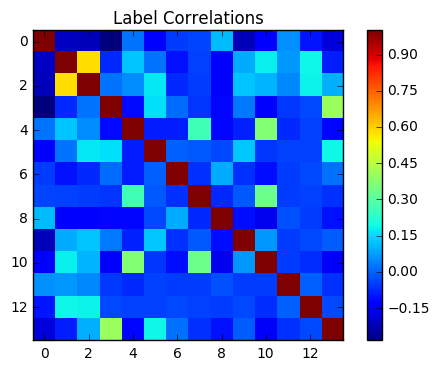

In [8]:
matrix = corr.values
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(matrix, interpolation='nearest', label = list_genres)
plt.colorbar()
plt.title('Label Correlations')
plt.show()

# Scores with random techniques

In [9]:
from sklearn.metrics import f1_score

print('Random Technique 1 : ')
y_pred = np.zeros(y_train.shape)
for i in range(len(data)):
    if data[i] > 0.5:
        y_pred[:,i] = np.ones(y_pred.shape[0])
        
f1_micro = f1_score(y_train, y_pred, average="micro")
f1_macro = f1_score(y_train, y_pred, average="macro")
f1_weighted = f1_score(y_train, y_pred, average="weighted")
f1_samples = f1_score(y_train, y_pred, average="samples")
    
print('F1-Score with micro compute: {0}'.format(f1_micro))
print('F1-Score with macro compute: {0}'.format(f1_macro))
print('F1-Score with weighted compute: {0}'.format(f1_weighted))
print('F1-Score with samples compute: {0}'.format(f1_samples))

print('\nRandom Technique 2 :')
y_pred = np.zeros(y_train.shape)
for j in range(y_train.shape[1]):
    inter = np.random.uniform(0,1,size = y_train.shape[0])
    inter = [ 1 if inter[i] > data[j] else 0 for i in range(y_train.shape[0])]
    y_pred[:,j] = inter

f1_micro = f1_score(y_train, y_pred, average="micro")
f1_macro = f1_score(y_train, y_pred, average="macro")
f1_weighted = f1_score(y_train, y_pred, average="weighted")
f1_samples = f1_score(y_train, y_pred, average="samples")

print('F1-Score with micro compute: {0}'.format(f1_micro))
print('F1-Score with macro compute: {0}'.format(f1_macro))
print('F1-Score with weighted compute: {0}'.format(f1_weighted))
print('F1-Score with samples compute: {0}'.format(f1_samples))

Random Technique 1 : 


/Users/guillaumelorre/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1-Score with micro compute: 0.382558649702
F1-Score with macro compute: 0.0524878898615
F1-Score with weighted compute: 0.209577893903
F1-Score with samples compute: 0.4216702647

Random Technique 2 :
F1-Score with micro compute: 0.212495526528
F1-Score with macro compute: 0.212375509357
F1-Score with weighted compute: 0.311920028813
F1-Score with samples compute: 0.201773374901


## Building a predictive model

The initial classifier in your starting kit (in the sample_code directory).

In [10]:
import classifier
reload(classifier)                               # If you make changes to your code you have to reload it
from classifier import Classifier
Classifier??

Train, run, and save your classifier and your predictions. If you saved a trained model and/or prediction results, the evaluation script will look for those and use those in priority [(1) use saved predictions; (2) if no predictions, use saved model, do not retrain, just test; (3) if neither, train and test model from scratch]. Compute the predictions with predict_proba, this is more versatile.

In [11]:
result_dir = 'res/'
outname = result_dir + dataname
clf = Classifier()
clf.fit(X_train, y_train)
Y_valid = clf.predict(X_valid) 
Y_test = clf.predict(X_test) 
clf.save(outname)
#clf.load(outname) # Uncomment to check reloading works
data_io.write(outname + '_valid.predict', Y_valid)
data_io.write(outname + '_test.predict', Y_test)
!ls $outname*

res/movies_model.pickle  res/movies_test.predict  res/movies_valid.predict


Compute the training accuracy.

In [12]:
from sklearn.cross_validation import train_test_split
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size = 0.4, random_state = 0)
def benchmark(clf, name):
    t0 = time()
    pred = clf.predict(X_valid)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
    
    f1_micro = f1_score(y_valid, pred, average="micro")
    f1_macro = f1_score(y_valid, pred, average="macro")
    f1_weighted = f1_score(y_valid, pred, average="weighted")
    f1_samples = f1_score(y_valid, pred, average="samples")
    
    print('F1-Score with micro compute: {0}'.format(f1_micro))
    print('F1-Score with macro compute: {0}'.format(f1_macro))
    print('F1-Score with weighted compute: {0}'.format(f1_weighted))
    print('F1-Score with samples compute: {0}'.format(f1_samples))
    print "\n"
    print classification_report(y_valid, pred, target_names=list_genres)
    
    return name, f1_micro, f1_macro, f1_weighted, f1_samples

results = []

/Users/guillaumelorre/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
from sklearn.metrics import f1_score, classification_report
# Directly predicts the (categorical) class labels              
class_labels = clf.get_classes()     
print 'Class labels=', class_labels

Class labels= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


Compute F1 scores

In [14]:
clf = Classifier()
clf.fit(X_training, y_training)
results.append(benchmark(clf, 'bernoulli - alpha - 0.005'))

test time:  0.626s
F1-Score with micro compute: 0.558959655024
F1-Score with macro compute: 0.484023685387
F1-Score with weighted compute: 0.558825035585
F1-Score with samples compute: 0.53578435202


                 precision    recall  f1-score   support

          drama       0.71      0.83      0.77      6000
         action       0.52      0.50      0.51      1999
      adventure       0.44      0.54      0.48      1801
      animation       0.53      0.58      0.56       738
          crime       0.54      0.47      0.50      1544
        fantasy       0.29      0.51      0.37       655
          music       0.28      0.34      0.31       802
        mystery       0.34      0.29      0.31       642
science fiction       0.42      0.57      0.49      2021
          sport       0.42      0.56      0.48       699
       thriller       0.51      0.48      0.49      2066
            war       0.56      0.52      0.54       471
        western       0.40      0.70      0.51       309


/Users/guillaumelorre/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


Plot F1 scores

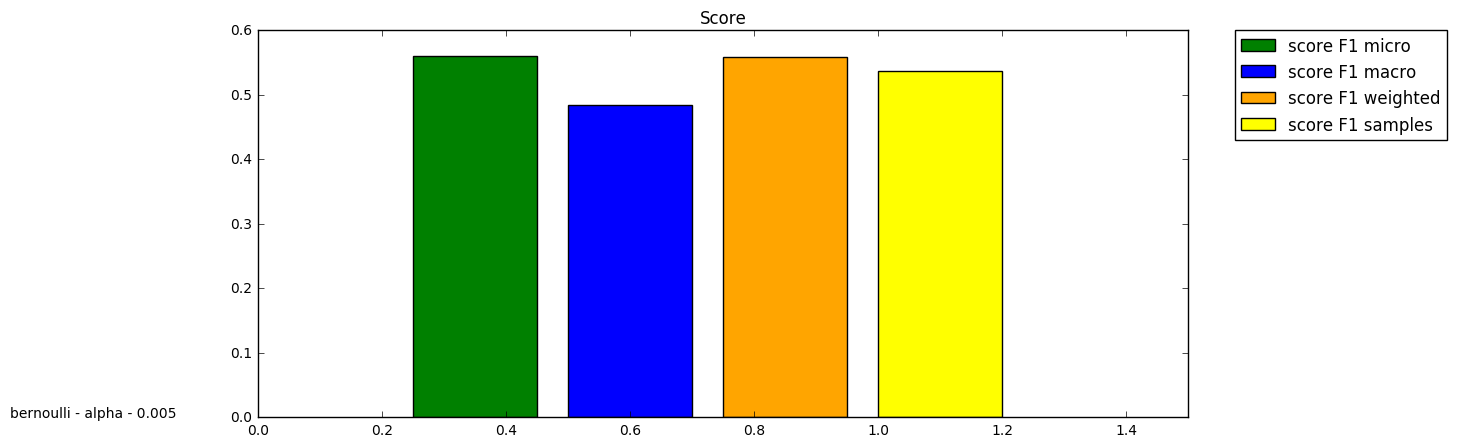

In [15]:
indices = np.arange(len(results))
results_final = [[x[i] for x in results] for i in range(5)]
clf_names, f1_micro, f1_macro, f1_weighted, f1_samples = results_final
width = 0.25
fig = plt.figure(figsize=(12, 5))
s = fig.add_subplot(111)
plt.title("Score")
s.bar(indices + width, f1_micro, .2, label="score F1 micro", color='green')
s.bar(indices + 2*width, f1_macro, .2, label="score F1 macro", color='blue')
s.bar(indices + 3*width, f1_weighted, .2, label="score F1 weighted", color='orange')
s.bar(indices + 4*width, f1_samples, .2, label="score F1 samples", color='yellow')
s.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
s.set_xlim(0, 1.5)

for i, c in zip(indices, clf_names):
    plt.text(-.4, i, c)

plt.show()

ADVANCED: Sklearn does not have multi-class metrics, this shows how libscore metrics work.

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>classifier.py</code> in the <code>sample_code/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission.  The program looks for saved results and saved models in the subdirectory <code>res/</code>. If it finds them, it will use them: (1) If results are found, then are copied to the output directory; (2) If no results but a trained model is found, it is reloaded and no training occurs; (3) If nothing is found a fresh model is trained and tested.

In [1]:
outdir = './res'         # If you use result_dir as output directory, your submission will include your results

In [ ]:
!python run.py $datadir $outdir

## Making your submission

The test program <code>run.py</code> prepares your <code>zip</code> file, ready to go. You find it in the directory above where you ran your program. For large datasets, we recommend that <b><span style="color:red">you do NOT bundle the data with your submission</span></b>. The data directory is passed as an argument to run.py, and it is already there on the test server.

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import f1_score
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

score = []
error_bars = []
for j in labels:
    clf = BernoulliNB(alpha = 0.005)
    clf.fit(X_training, y_training[:,j])
    for i in range(100):
        X_sub_test, y_sub_test = resample(X_valid, y_valid[:,j],replace=True)
        y_pred = clf.predict(X_sub_test)
        f1_weighted = f1_score(y_sub_test, y_pred, average = "binary")
        score.append(f1_weighted)
    print np.std(score)
    error_bars.append(np.std(score))

0.00484637013335
0.130203303215
0.129078533266


0.772118787506
0.512330145949
0.480474542758
0.59173126615
0.498284145504
0.378650553877
0.333333333333
0.317002881844
0.520773344303
0.473568281938
0.484230955847
0.548
0.447876447876
0.46968238691


<Container object of 3 artists>

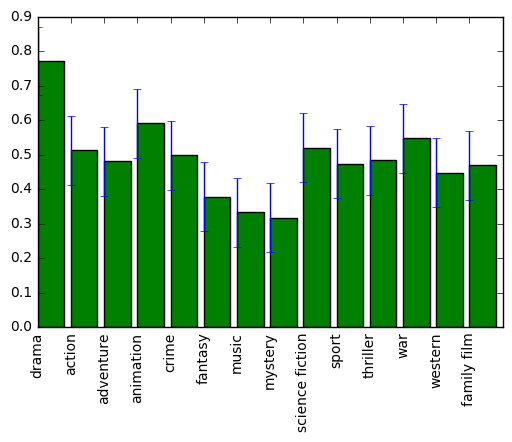

In [38]:
# Chain Classifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.cross_validation import train_test_split
from scipy import sparse
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

#order = [0,3,11,1,12,4,8,10,9,2,5,6,7]

labels = class_labels
scores = []
nb_ex = []
for i in range(len(class_labels)):
    y_training_1 = y_training[:,i]
    clf =  BernoulliNB(alpha = 0.005)
    clf.fit(X_training, y_training_1)
    pred = clf.predict(X_valid)
    f1 = f1_score(y_valid[:,i], pred, average="binary")
    scores.append(f1)
    nb_ex.append(len(y_training_1))
    print(f1)
    #X_training = sparse.hstack((X_training, y_training_1.reshape(len(y_training_1), 1)))
    #X_valid = sparse.hstack((X_valid, pred.reshape(len(pred), 1)))

scores = np.array(scores)
my_xticks = list_genres
plt.xticks(labels, my_xticks, rotation = 'vertical')
plt.xlim(0,14, 10)
plt.bar(labels, scores, color="green")
err = 0.1*np.ones(len(labels))
plt.errorbar(labels, scores, yerr=error_bars, fmt='none')
#nb_ex = np.array(nb_ex)
#wheighted_score = scores.dot(nb_ex)/(nb_ex.sum()*1.0)
#print("weighted_score : " + str(wheighted_score))

<Container object of 3 artists>

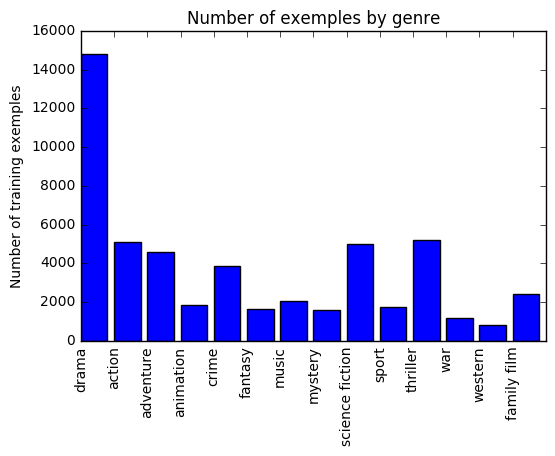

In [30]:
scores = y_train.sum(axis = 0)
n = len(scores)
mid = scores
my_xticks = list_genres
plt.xticks(labels, my_xticks, rotation = 'vertical')
plt.xlim(0,14, 10)
plt.title("Number of exemples by genre")
plt.ylabel('Number of training exemples')
plt.bar(labels, scores, color="blue")
plt.errorbar(5, n, yerr=0.01, fmt='none')

In [ ]:
assoc = {}
assoc_inv = {}
count = 0
for i in range(y_train.shape[0]):
    if tuple(y_train[i]) not in assoc.keys():
        assoc[tuple(y_train[i])] = count
        assoc_inv[count] = y_train[i]
        count += 1
        


In [20]:
from sklearn.model_selection import learning_curve
clf = Classifier()
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, scoring = 'f1_weighted', train_sizes = np.linspace(0.1, 1.0, 10))

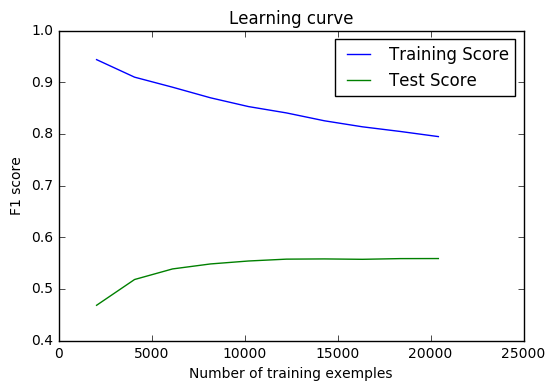

In [21]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.title('Learning curve')
plt.ylabel('F1 score')
plt.xlabel('Number of training exemples')
plt.plot(train_sizes, train_scores_mean, label = 'Training Score')
plt.plot(train_sizes, test_scores_mean, label = 'Test Score')
plt.legend()

In [23]:
from sklearn.feature_selection import chi2, SelectKBest
labels = range(y_train.shape[1])
selected_features = [] 
for label in labels:
    selector = SelectKBest(chi2, k='all')
    selector.fit(X_train, y_train[:,label])
    selected_features.append(list(selector.scores_))

threshold = 15000  
    
#MeanCS 
selected_features = np.mean(selected_features, axis=0) > threshold
#MaxCS
#selected_features = np.max(selected_features, axis=0) > threshold

In [25]:
def feature_select(X, y):
    labels = range(y.shape[1])
    selected_features = [] 
    for label in labels:
        selector = SelectKBest(chi2, k='all')
        selector.fit(X, y[:,label])
        selected_features.append(list(selector.scores_))

    threshold = 15000  
    
    #MeanCS 
    selected_features = np.mean(selected_features, axis=0) > threshold
    return selected_features

In [27]:
X_train_select, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)
selected_features = feature_select(X_train_select, y_train2)
X_train_select = X_train_select[:,selected_features]
X_valid = X_valid[:,selected_features]
clf = Classifier()
clf.fit(X_train_select, y_train2)
pred = clf.predict(X_valid)
f1_weighted = f1_score(y_valid, pred, average="weighted")
print(f1_weighted)

0.587576359946


In [39]:
print(labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
